In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
from utils.mlTraining.trainer import TrainSixExplorer
from utils.plotter import plot

In [4]:
import awkward as ak
import matplotlib.pyplot as plt
# %matplotlib widget
%matplotlib inline
import numpy as np

In [5]:
filename = '../inputs/NMSSM_XYH_YToHH_6b_MX_700_MY_400_training_set_small_batch.root'

In [10]:
training = TrainSixExplorer(filename)

In [11]:
nsixb = training.t6_n_signal

In [12]:
jet_pt = training.get_t6('jet_pt')
jet_eta = training.get_t6('jet_eta')
jet_phi = training.get_t6('jet_phi')
jet_m = training.get_t6('jet_m')
jet_btag = training.get_t6('jet_btag')

In [13]:
features = ak.concatenate((jet_pt, jet_eta, jet_phi, jet_m, jet_btag, jet_pt**2, jet_eta**2, jet_phi**2, jet_m**2, jet_btag**2), axis=1)

In [14]:
targets = np.zeros((len(features), 7), int)

In [15]:
targets[np.arange(len(features)), nsixb.to_numpy()] += 1

In [11]:
# signal_features = ak.concatenate((jet_pt[signal], jet_eta[signal], jet_phi[signal], jet_m[signal], jet_btag[signal], jet_pt[signal]**2, jet_eta[signal]**2, jet_phi[signal]**2, jet_m[signal]**2, jet_btag[signal]**2), axis=1)
# wrong_features = ak.concatenate((jet_pt[cbkgd], jet_eta[cbkgd], jet_phi[cbkgd], jet_m[cbkgd], jet_btag[cbkgd], jet_pt[cbkgd]**2, jet_eta[cbkgd]**2, jet_phi[cbkgd]**2, jet_m[cbkgd]**2, jet_btag[cbkgd]**2), axis=1)

In [12]:
import pandas as pd

In [13]:
cols = [f'pt {n}' for n in range(6)] + [f'eta {n}' for n in range(6)] + [f'phi {n}' for n in range(6)] + [f'm {n}' for n in range(6)] + [f'btag {n}' for n in range(6)]
cols = cols + [f'pt sq {n}' for n in range(6)] + [f'eta sq {n}' for n in range(6)] + [f'phi sq {n}' for n in range(6)] + [f'm sq {n}' for n in range(6)] + [f'btag sq {n}' for n in range(6)]

In [14]:
len(cols)

60

In [13]:
# targets = np.row_stack((np.tile([1,0], (len(signal_features), 1)), np.tile([0,1], (len(wrong_features), 1))))

In [15]:
df = pd.DataFrame(np.column_stack((features.to_numpy(), targets)), columns=cols + [f'{n} signal' for n in range(7)])

In [16]:
df['n6'] = nsixb.to_numpy()

In [17]:
for i in range(7):
#     df[f'{i} signal'] = df[f'{i} signal'].astype(int)
    df.pop(f'{i} signal')

In [18]:
df.head()

,pt 0,pt 1,pt 2,pt 3,pt 4,pt 5,eta 0,eta 1,eta 2,eta 3,...,m sq 3,m sq 4,m sq 5,btag sq 0,btag sq 1,btag sq 2,btag sq 3,btag sq 4,btag sq 5,n6
0,193.546234,134.205917,85.719055,39.674183,32.544888,123.608131,-1.706055,-1.337402,-1.283936,-0.184906,...,39.123833,27.942741,232.909897,0.970918,0.984436,0.799313,0.611115,0.010919,0.000058,3
1,98.728340,92.501930,42.790783,85.532120,51.495480,192.918686,-1.539551,-0.907959,-2.154297,-1.970947,...,94.865479,62.592400,1481.084961,0.843563,0.996098,0.910310,0.181706,0.000189,0.000179,4
2,174.225586,110.410782,94.921982,76.186264,59.059498,121.445740,-0.705566,-0.086624,-0.769775,-0.989502,...,327.642273,60.359184,381.461823,0.875248,0.870686,0.999024,0.824833,0.866136,0.238657,5
3,139.278458,108.502708,80.912331,49.428757,138.276779,38.904430,1.292480,-0.399475,1.108643,-0.546021,...,50.198315,218.953125,44.495548,0.985405,0.999024,0.999024,0.692276,0.070168,0.002357,5
4,129.189850,127.606888,117.184288,80.407341,76.879517,30.937653,-0.072662,-0.308228,-0.537109,0.058594,...,76.996330,90.566216,60.791187,0.769047,0.999024,0.996098,0.999024,0.997072,0.328047,5


In [50]:
grouped_df = df.groupby('n6')

In [19]:
import seaborn as sns

In [22]:
plt.clf()

<Figure size 432x288 with 0 Axes>

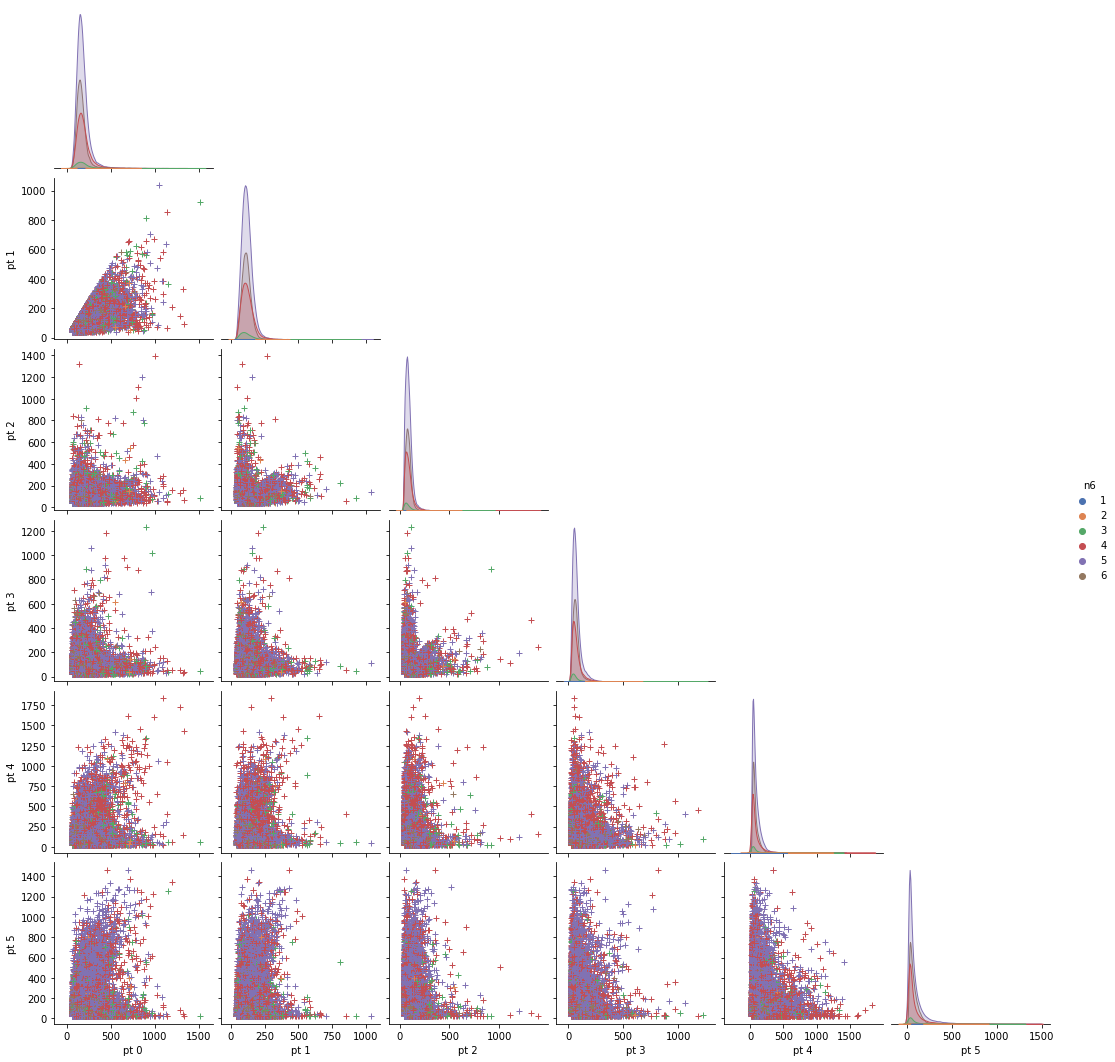

In [29]:
sns.pairplot(vars=["pt 0","pt 1","pt 2", "pt 3", "pt 4", "pt 5"], data=df, hue="n6", corner=True, palette="deep",
             plot_kws=dict(marker="+", linewidth=1),
             diag_kind='kde')
plt.show()